In [2]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [5]:
data = pd.read_csv("../Dataset/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/tmp/ipykernel_3896/3038628357.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_3896/3038628357.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_3896/3038628357.py:7: UserWarning: 

`distplot` is a deprecated function and will be re

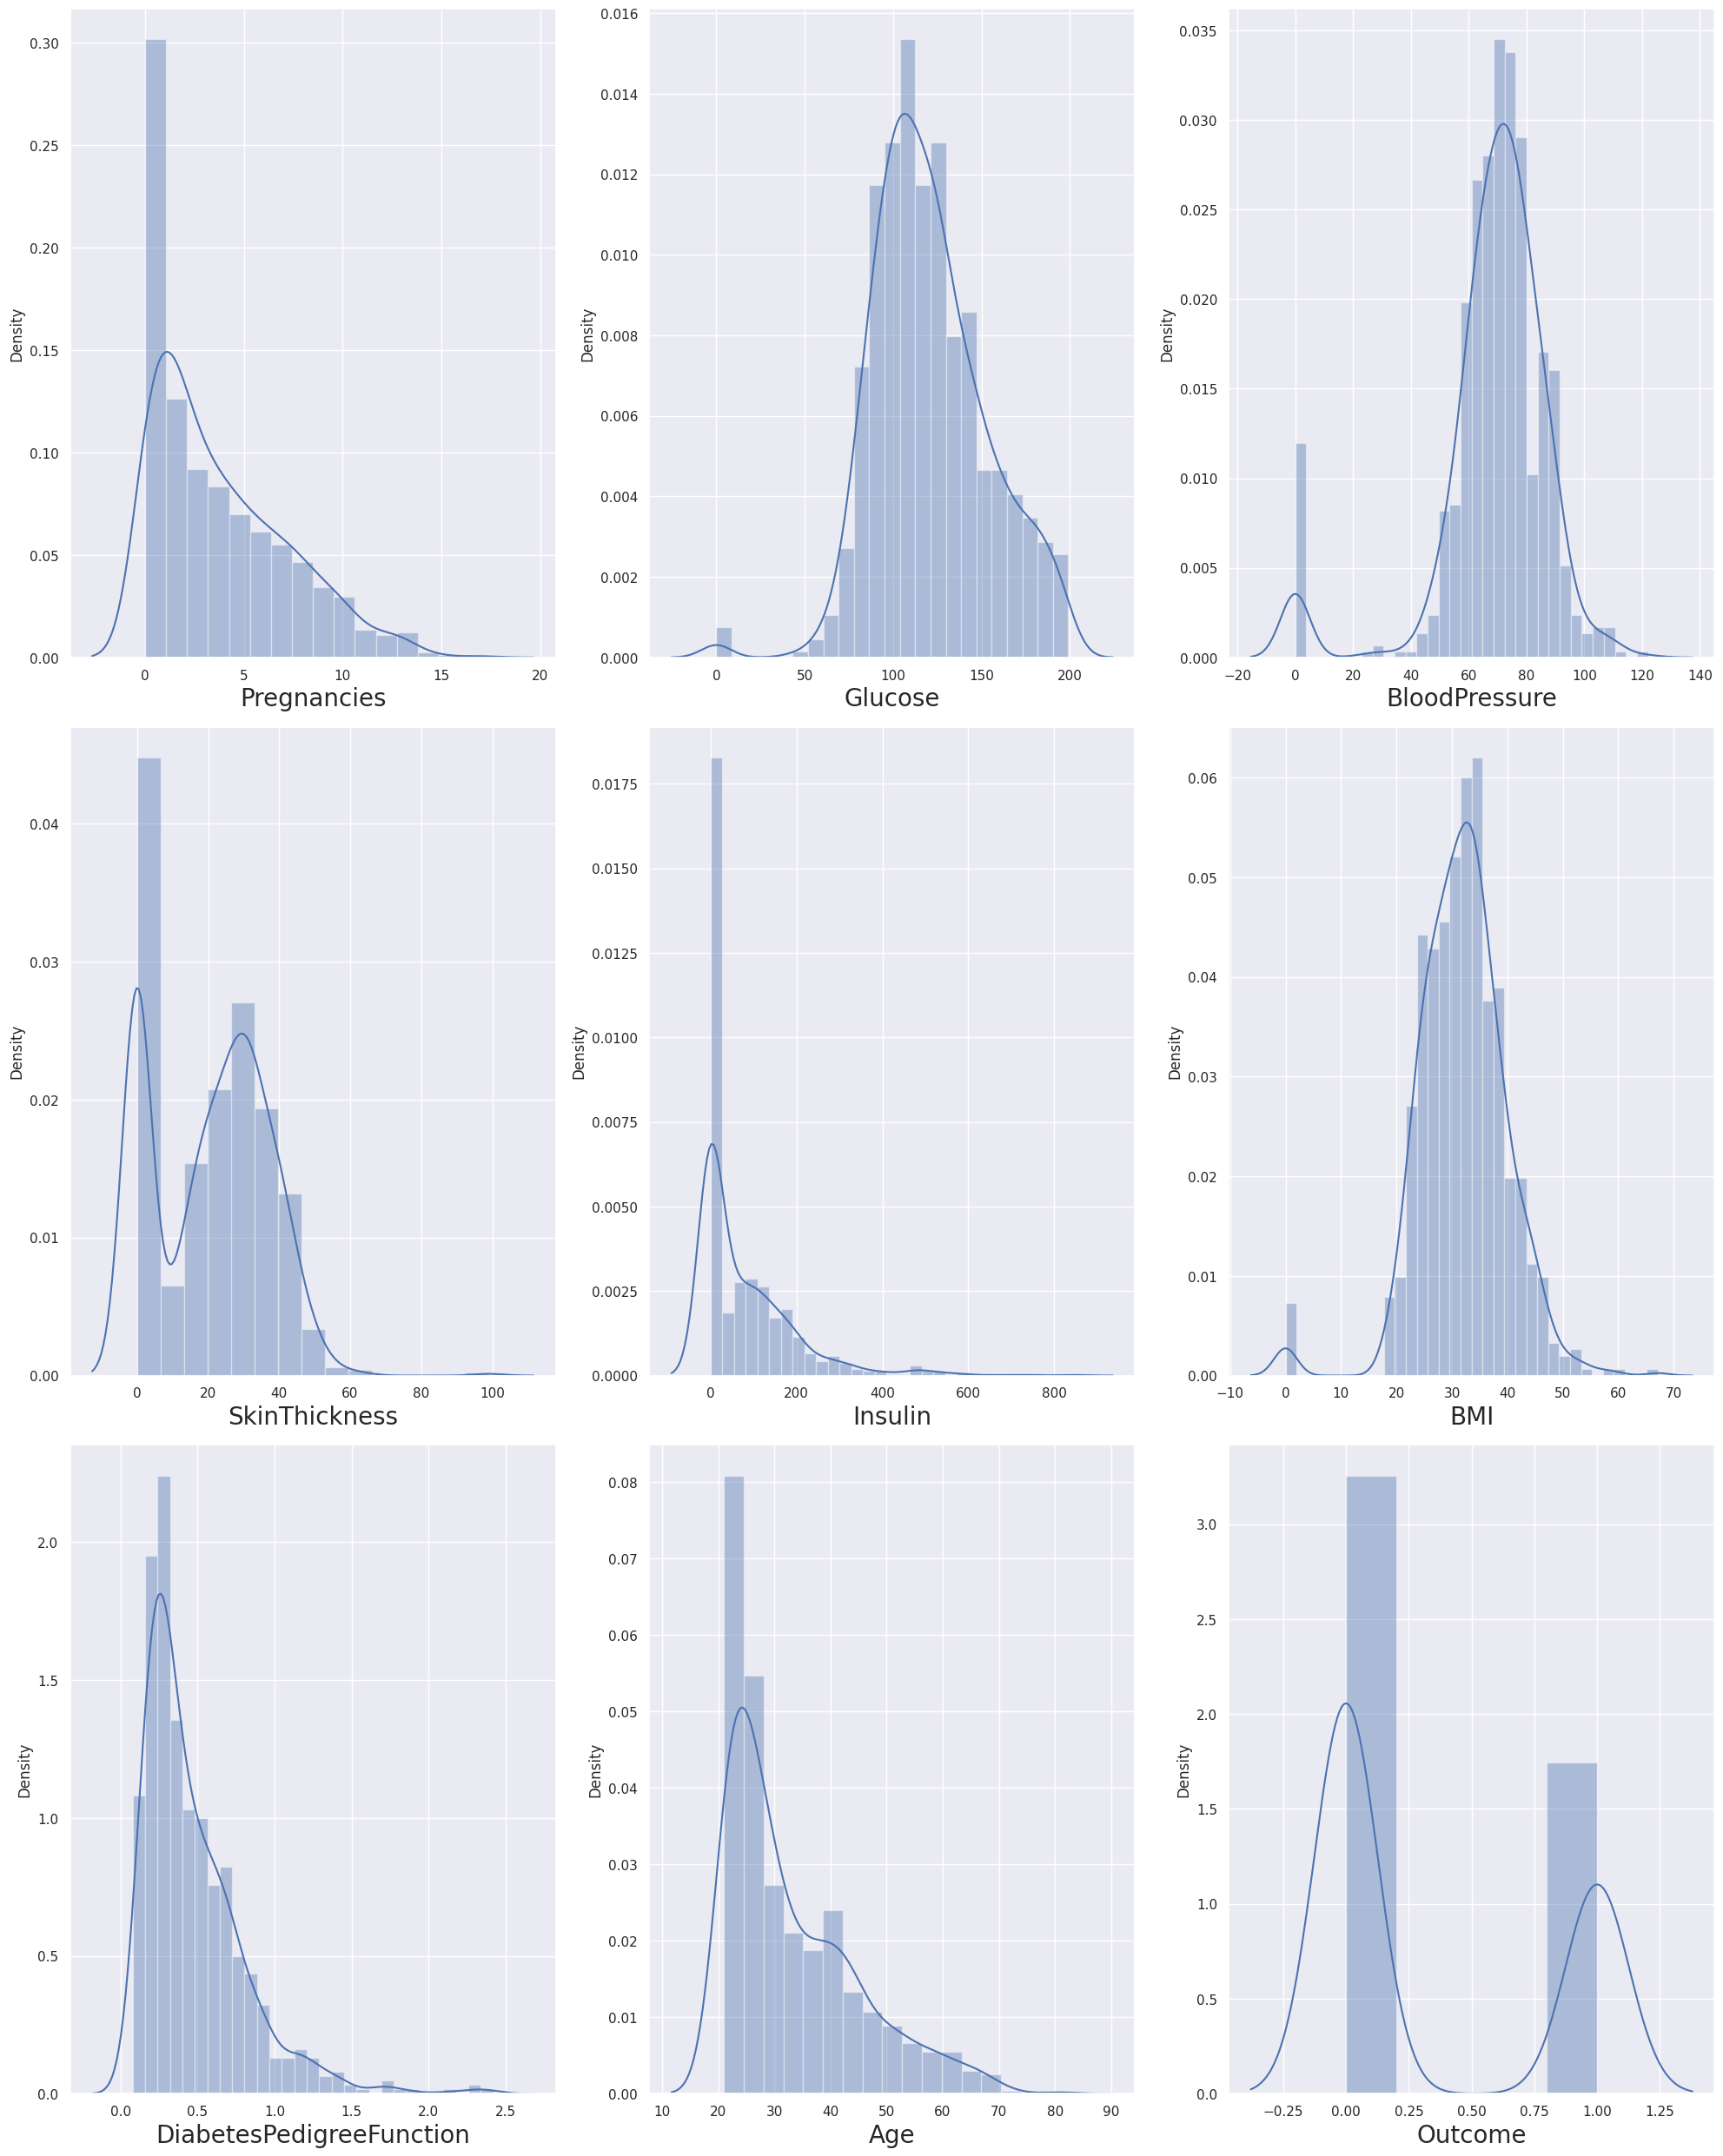

In [9]:
plt.figure(figsize=(20, 25), facecolor="white")
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can see that we have skewness in our data 
So let's work on it 

Also, we can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [10]:
data["BMI"] = data["BMI"].replace(0, data["BMI"].mean())
data["BloodPressure"] = data["BloodPressure"].replace(0, data["BloodPressure"].mean())
data["Glucose"] = data["Glucose"].replace(0, data["Glucose"].mean())
data["Insulin"] = data["Insulin"].replace(0, data["Insulin"].mean())
data["SkinThickness"] = data["SkinThickness"].replace(0, data["SkinThickness"].mean())

# pregnancies data also look skewed towards left because of some outliers,
# to remove outliers
q = data["Pregnancies"].quantile(0.95)
data_cleaned = data[data["Pregnancies"]<q]

/tmp/ipykernel_3896/3870596238.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_3896/3870596238.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_3896/3870596238.py:7: UserWarning: 

`distplot` is a deprecated function and will be re

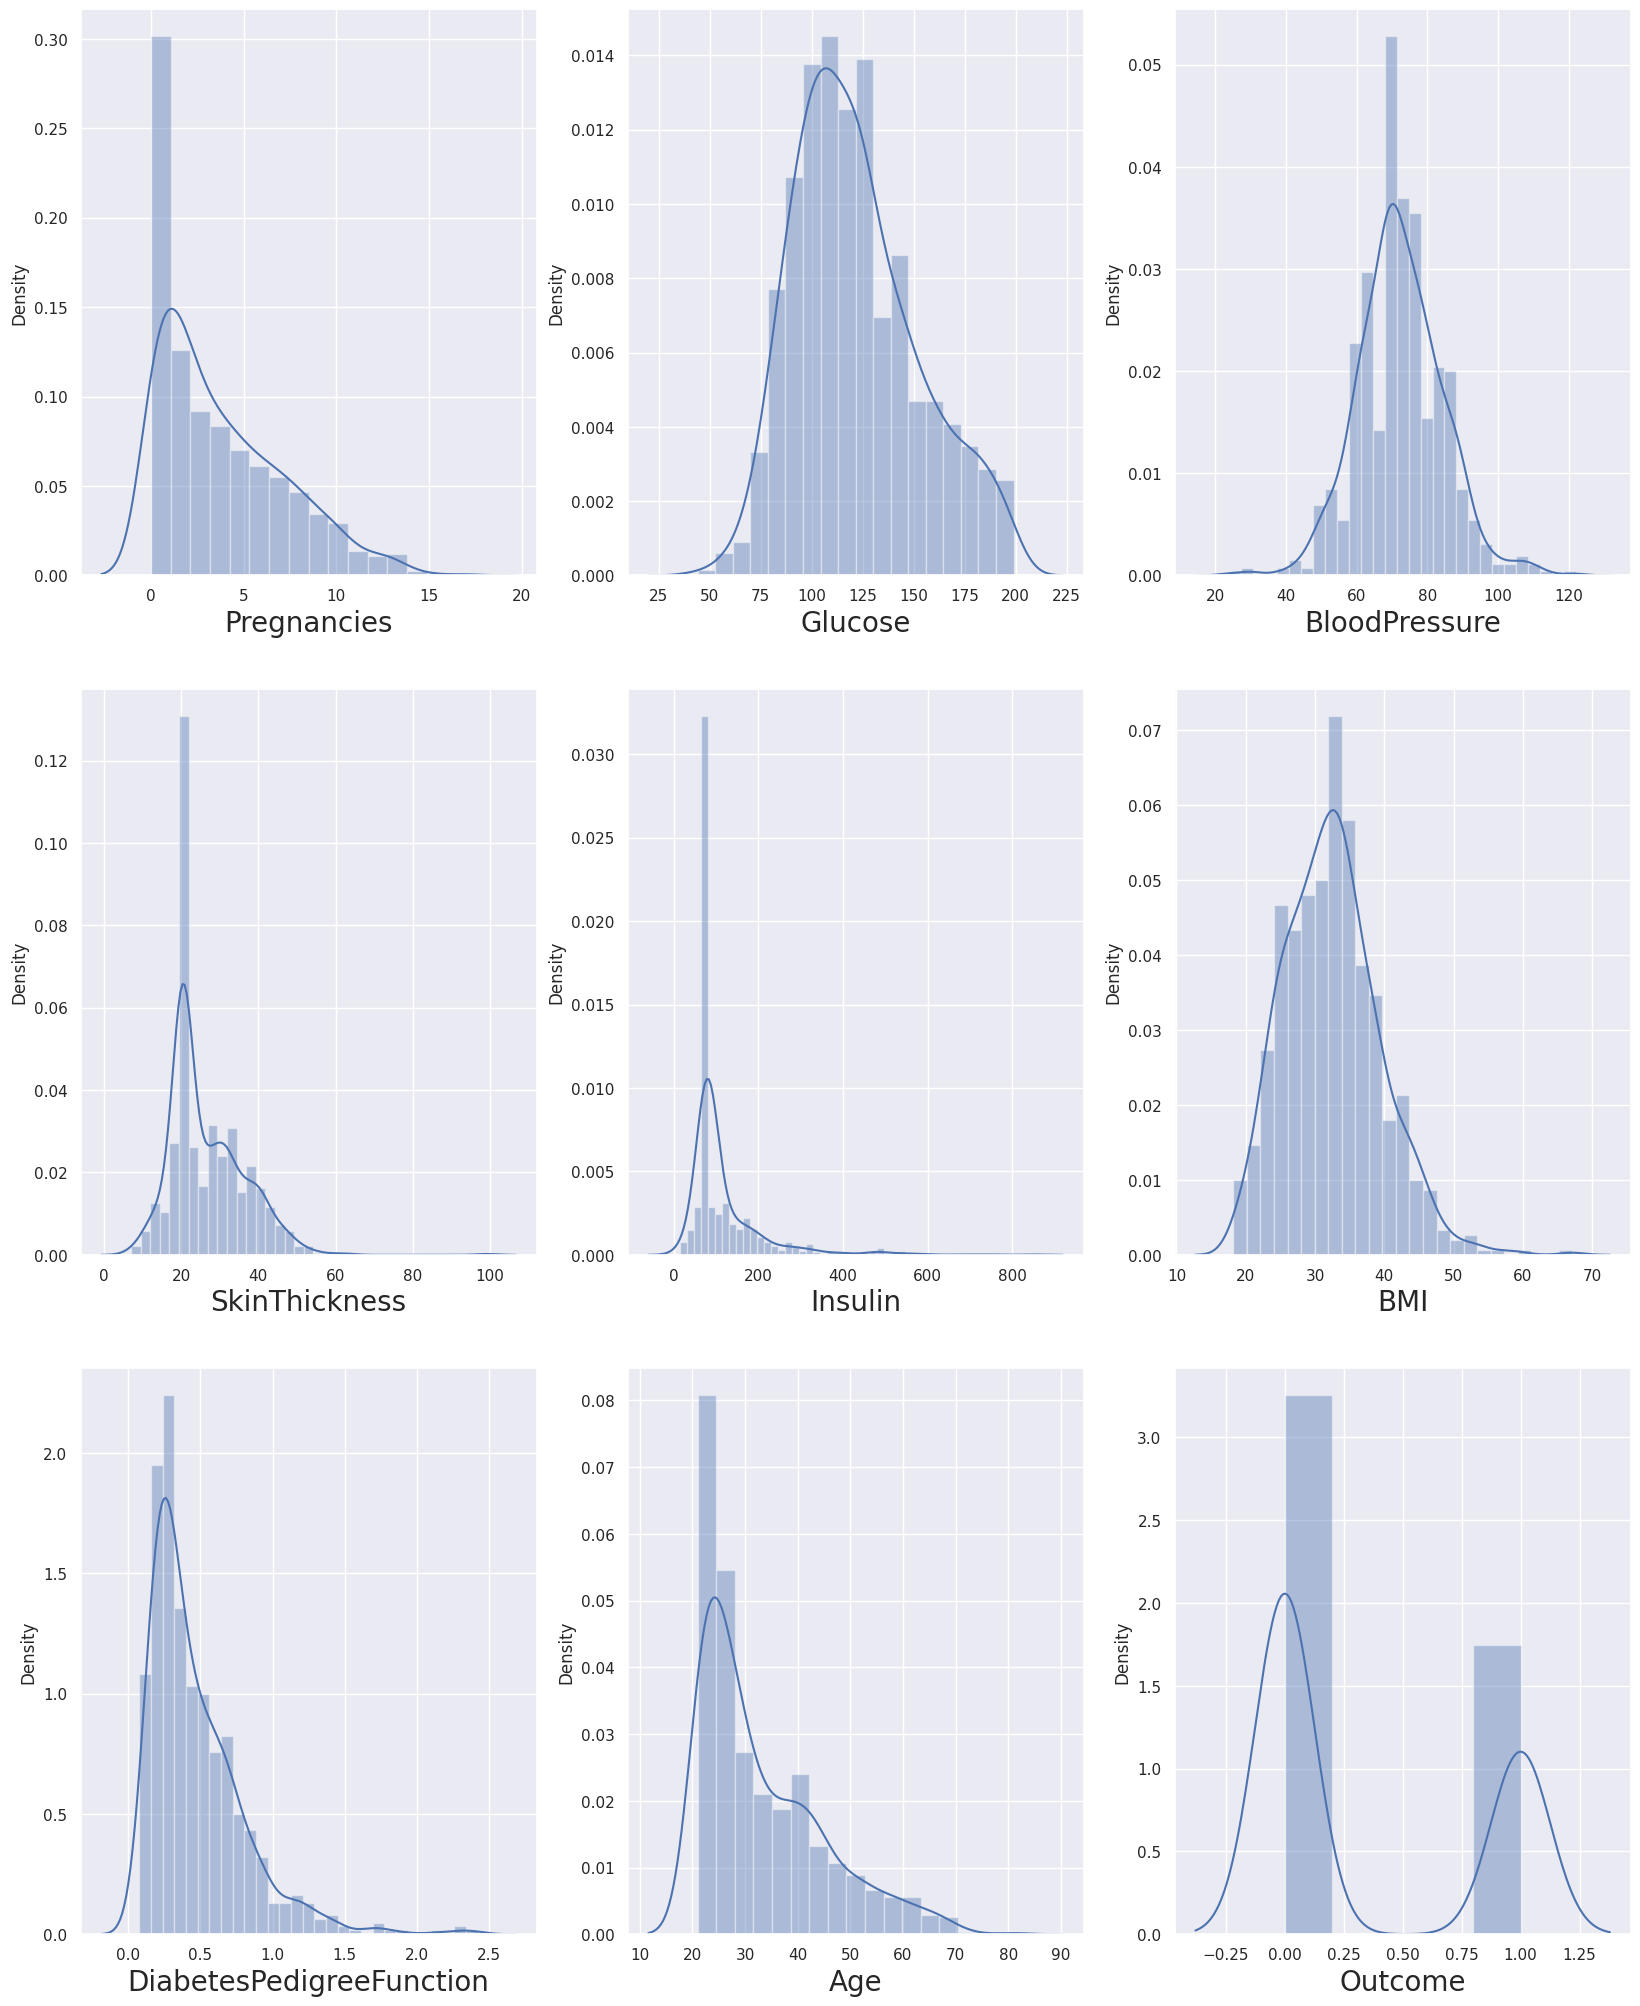

In [11]:
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

<Axes: >

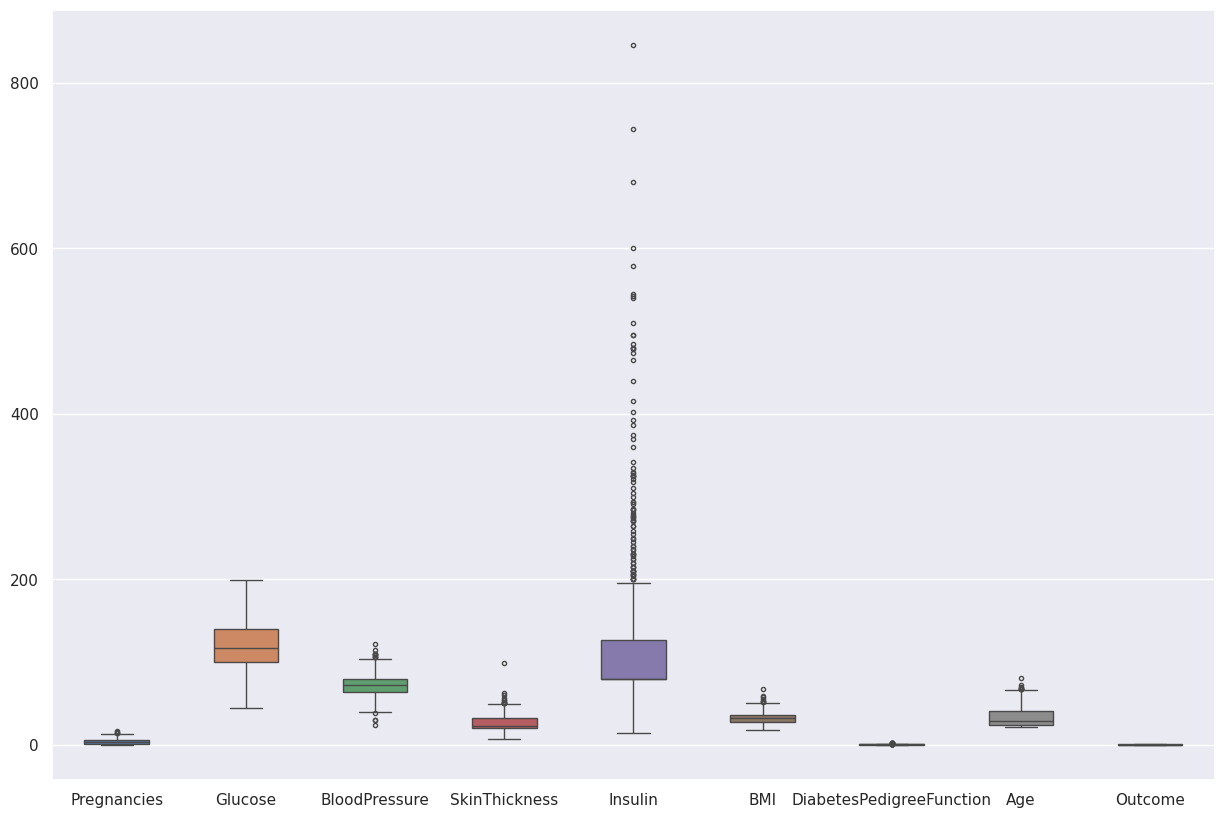

In [12]:
# let's see the outliers by plotting box plot
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=data, width=0.5, ax=ax, fliersize=3)

In [13]:
# let's deal with the outliers
q = data["Pregnancies"].quantile(0.98)
data_cleaned = data[data["Pregnancies"]<q] # this is removing things which are outside the given quantiles

q = data_cleaned["BMI"].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned["BMI"]<q]

q = data_cleaned["SkinThickness"].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned["SkinThickness"]<q]

q = data_cleaned["Insulin"].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned["Insulin"]<q]

q = data_cleaned["DiabetesPedigreeFunction"].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned["DiabetesPedigreeFunction"]<q]

q = data_cleaned["Age"].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned["Age"]<q]

/tmp/ipykernel_3896/574517285.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])
/tmp/ipykernel_3896/574517285.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])
/tmp/ipykernel_3896/574517285.py:7: UserWarning: 

`distplot` is a deprecated function a

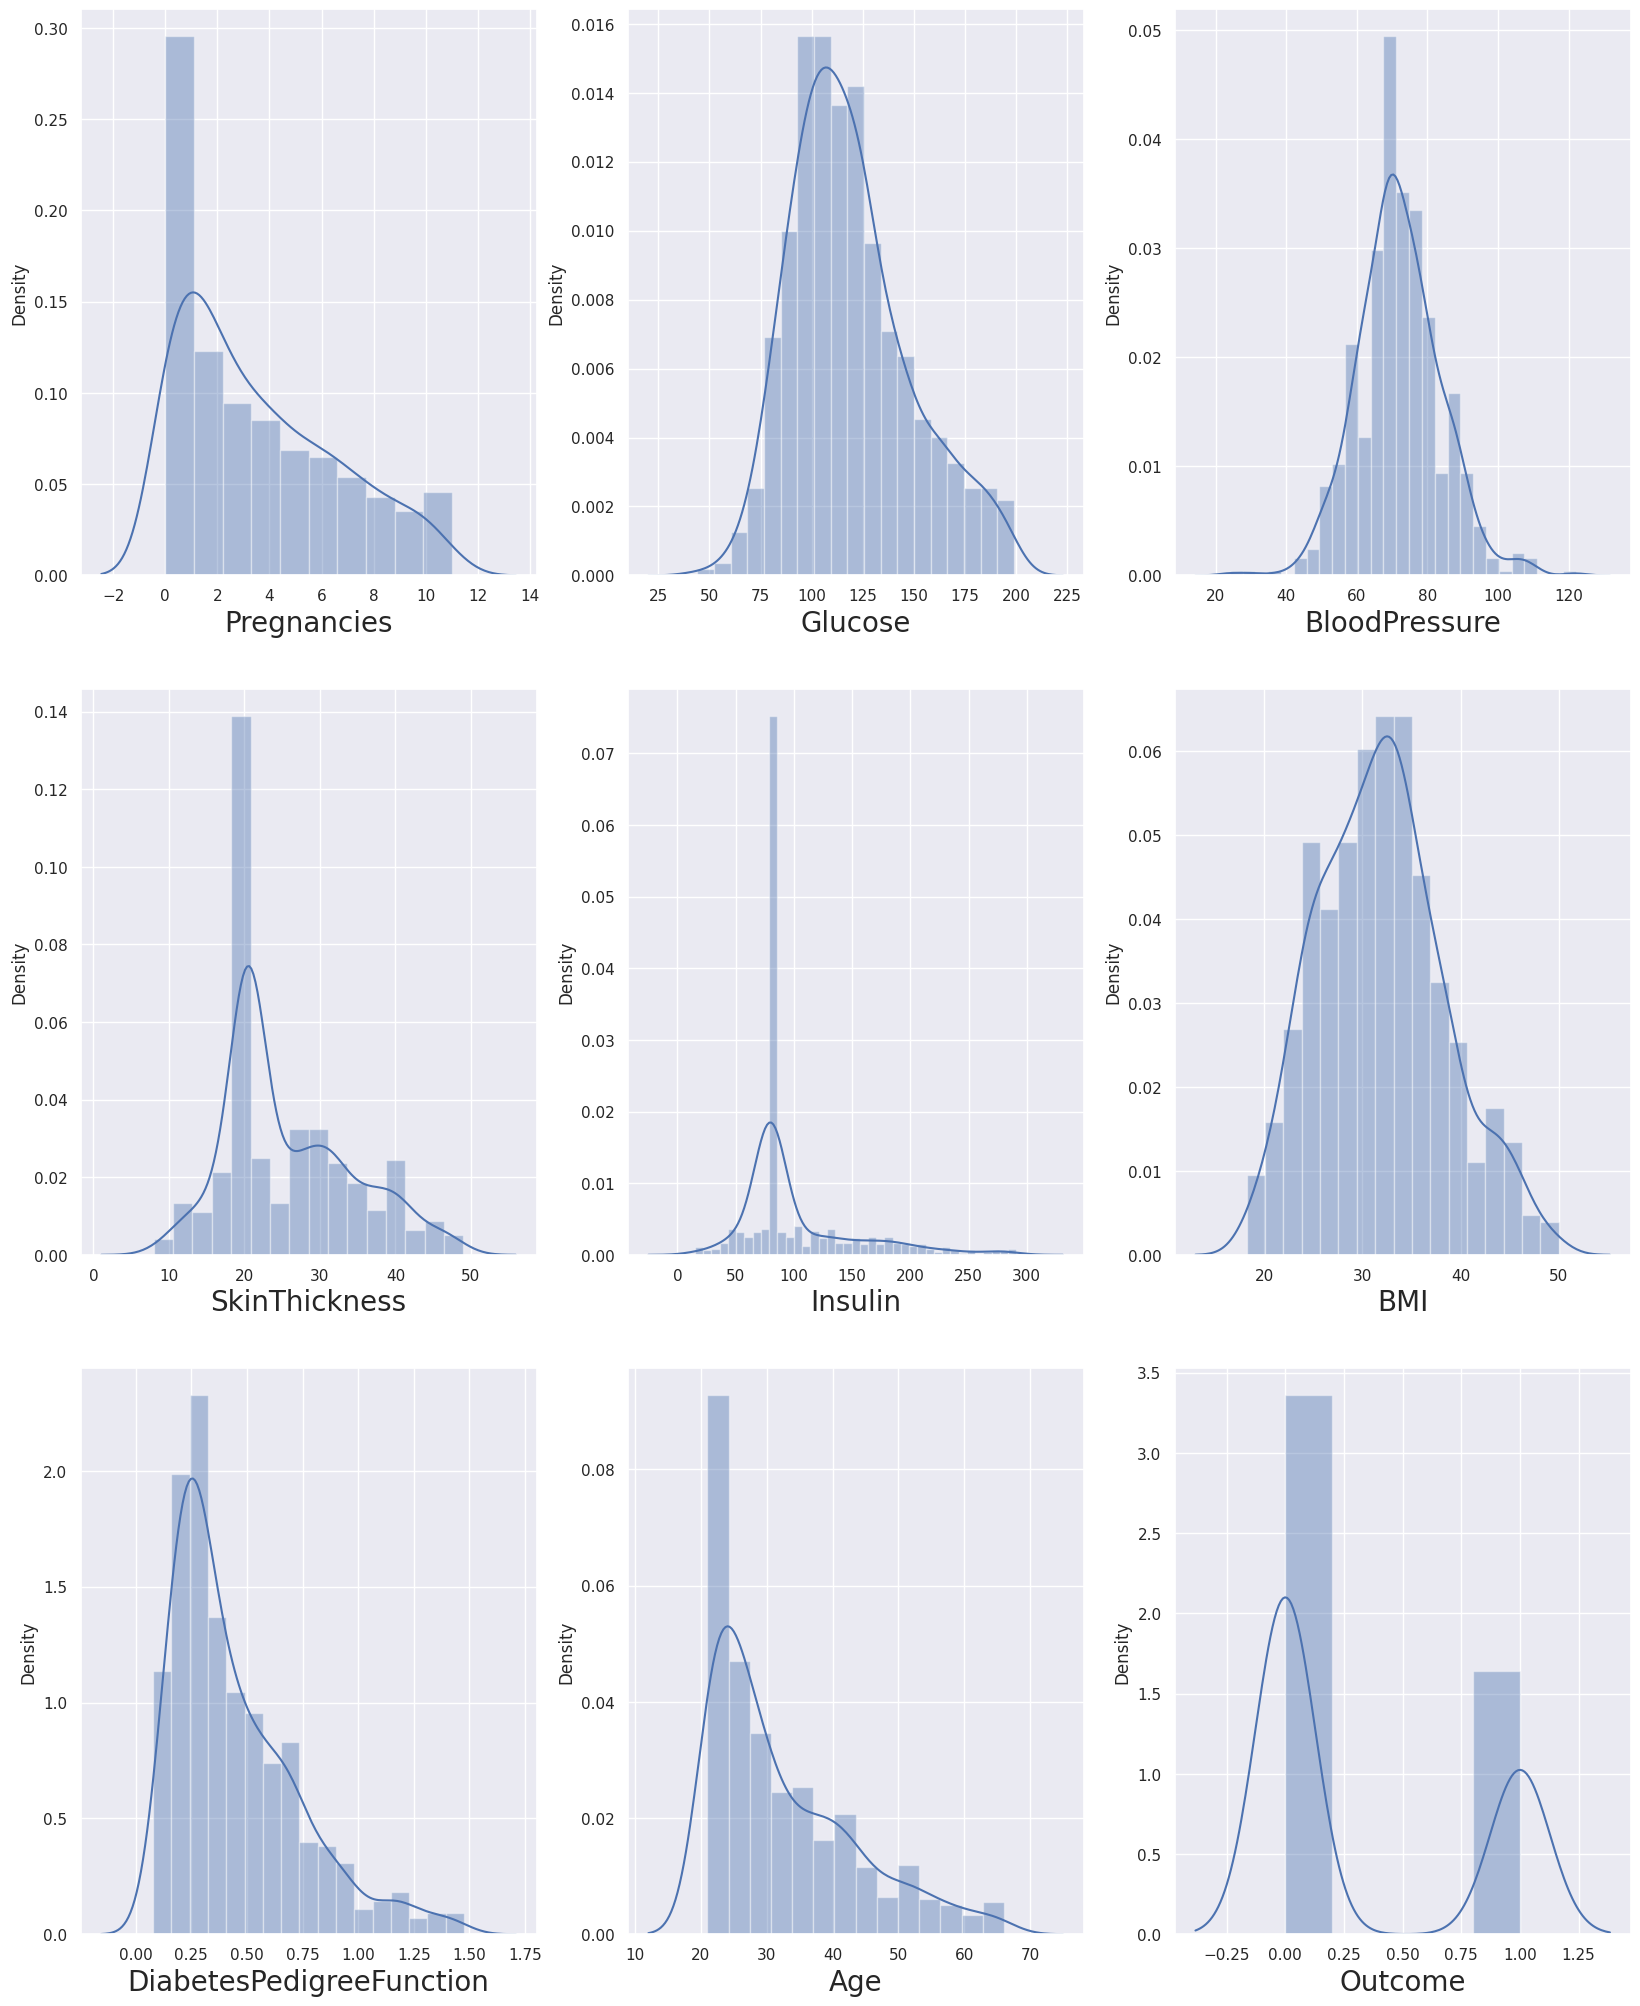

In [14]:
plt.figure(figsize=(20, 25), facecolor="white")
plotnumber = 1

for column in data_cleaned:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

<Axes: >

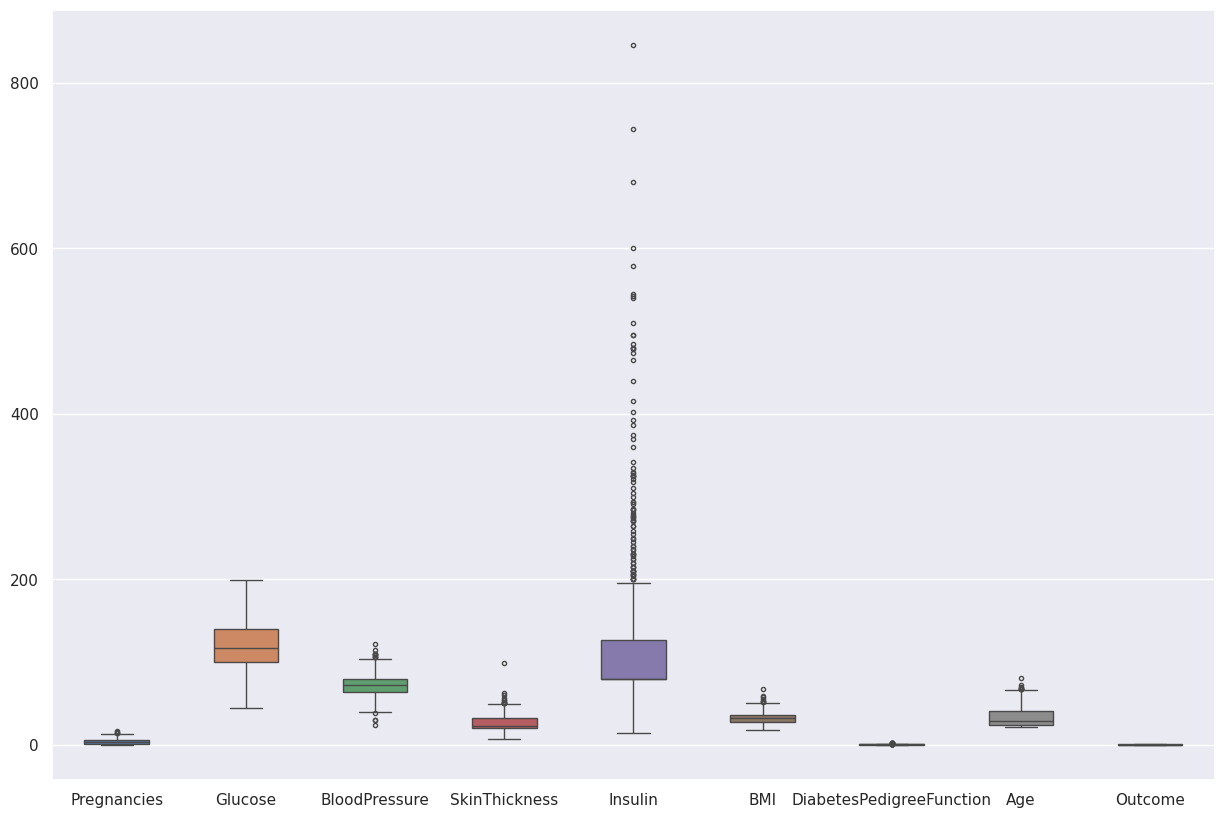

In [15]:
fig ,ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=data, width=0.5, ax=ax, fliersize=3)

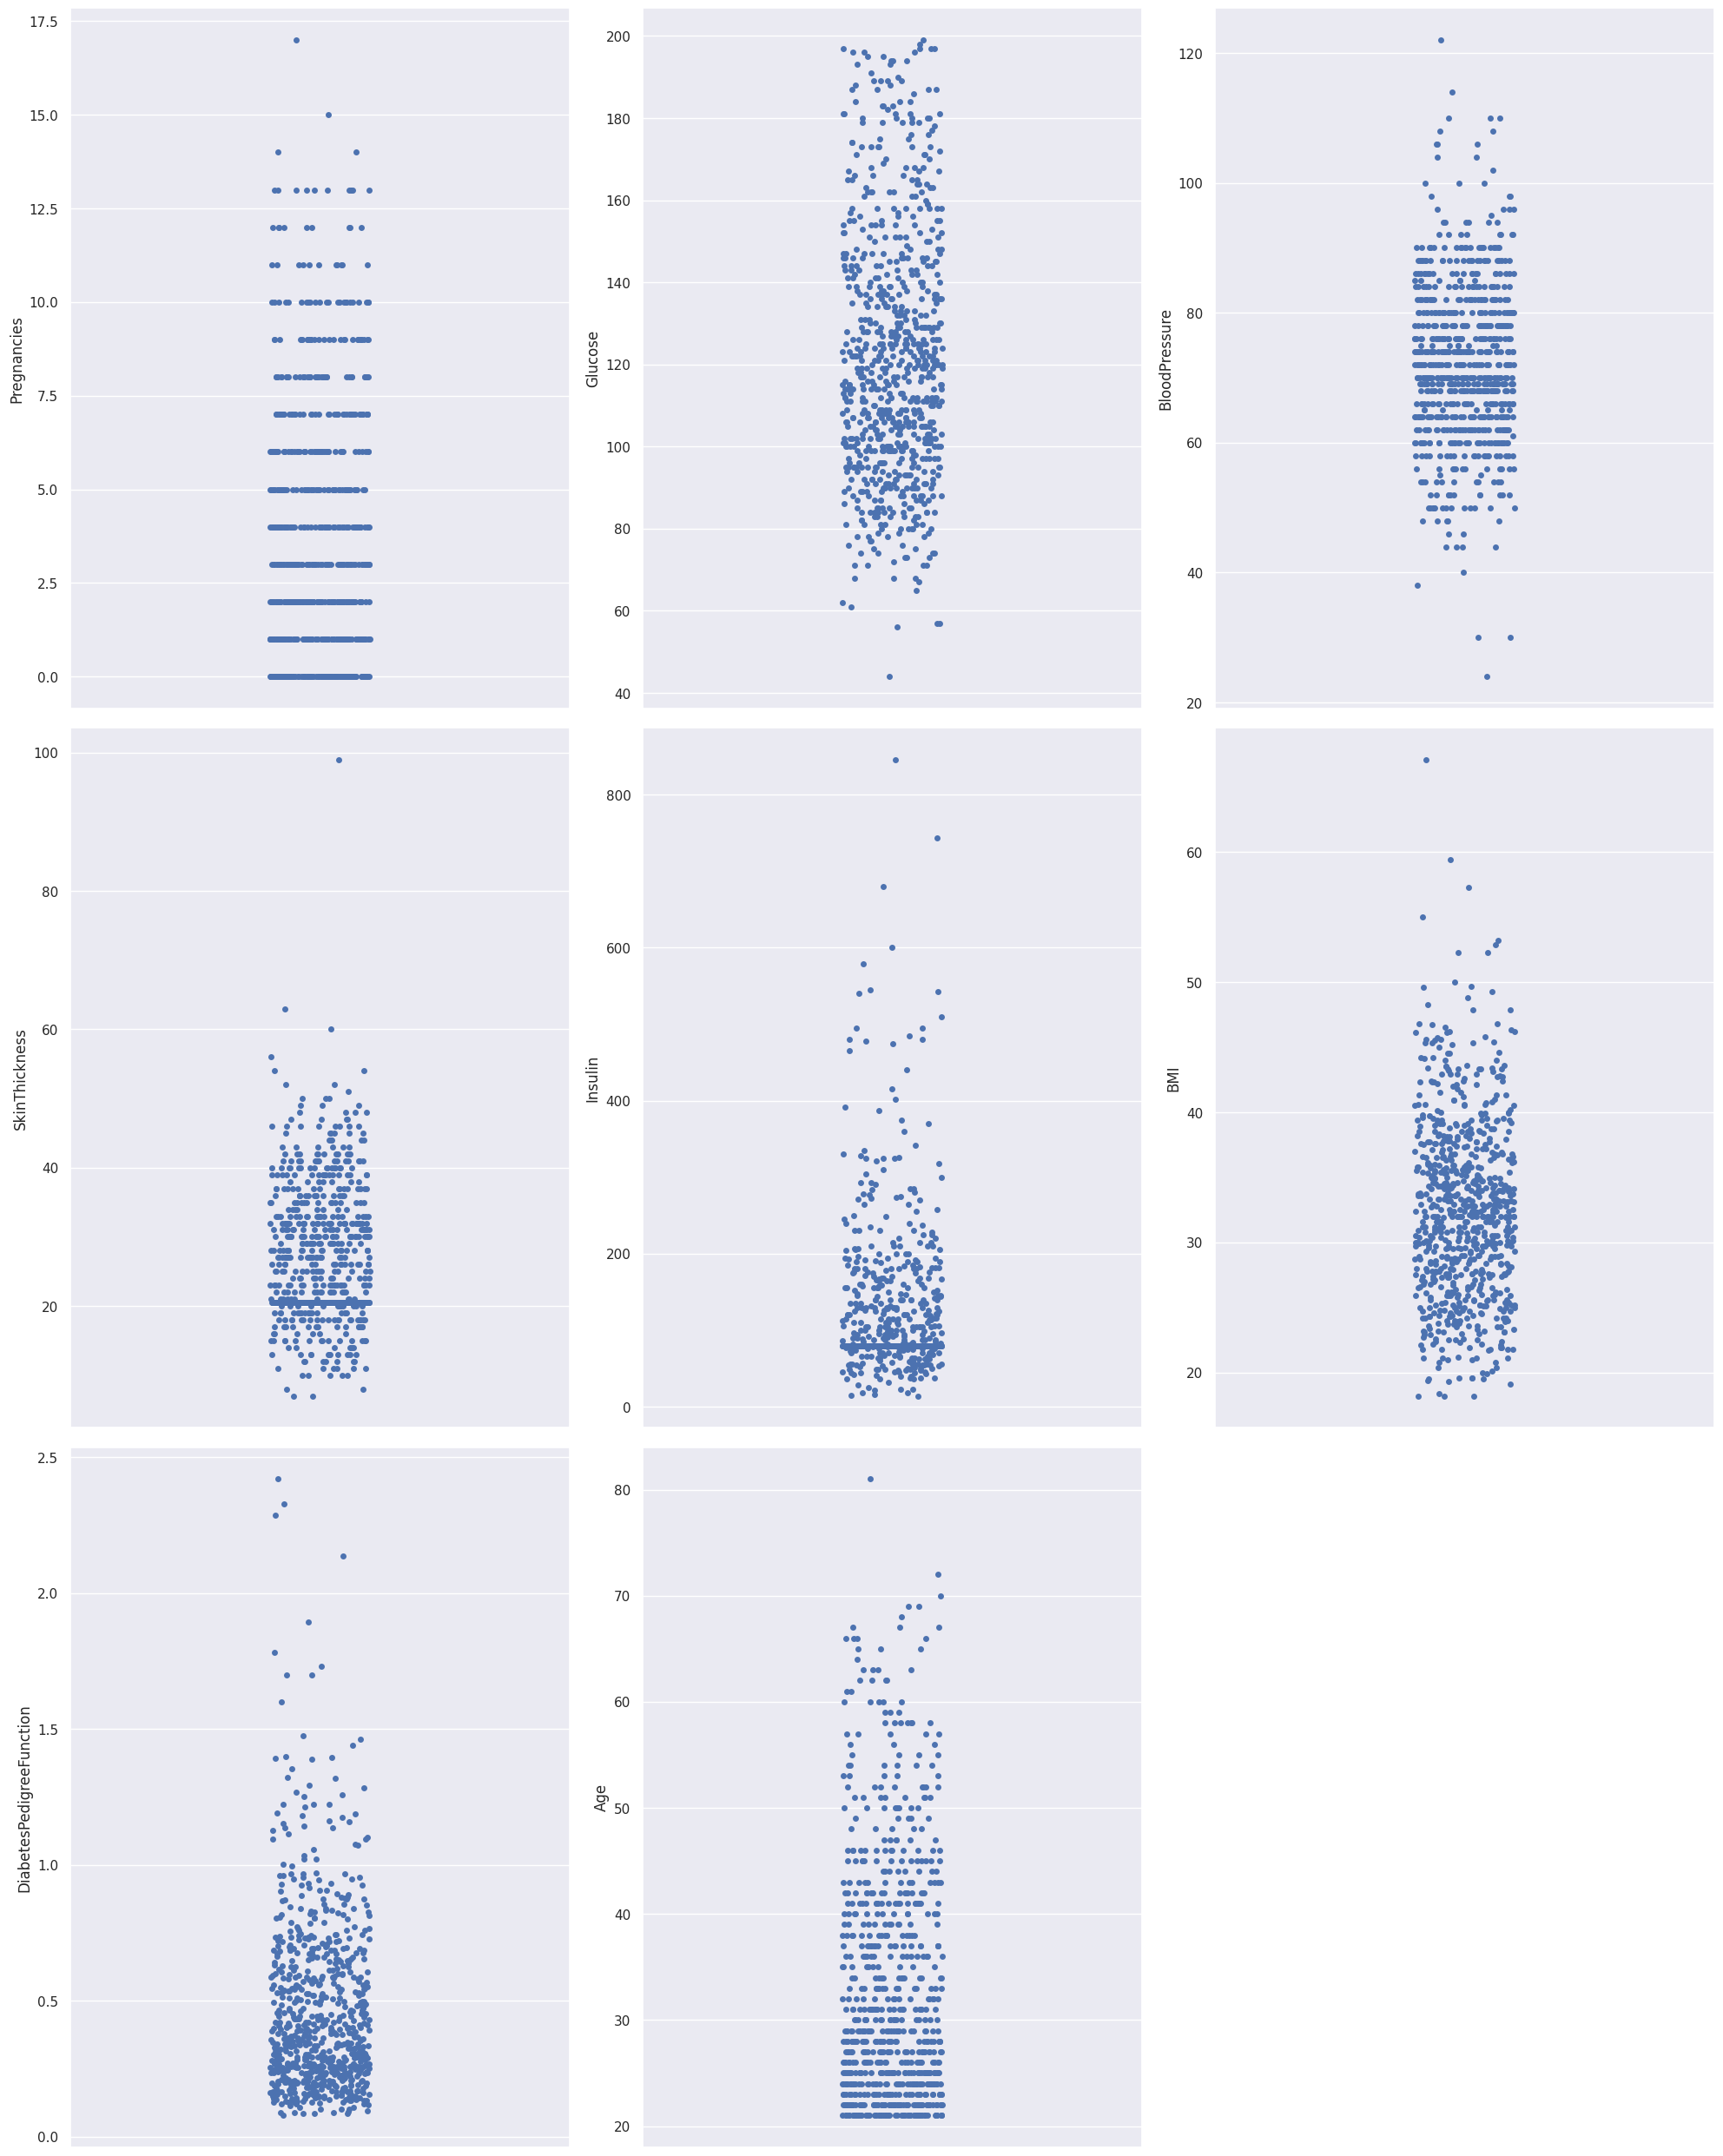

In [22]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(X[column])
        # sns.stripplot(y)
        #plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [32]:
X = data_cleaned.drop(columns = ["Outcome"])
y = data_cleaned["Outcome"]
print(X.shape)
print(y.shape)

(674, 8)
(674,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((505, 8), (169, 8))

In [45]:
import bz2, pickle
def scaler_standard(X_train, X_test):
    # scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)

    # saving the model
    file = bz2.BZ2File("../Model/standardScaler.pkl", "wb")
    pickle.dump(scaler, file)
    file.close()

    return X_train_scaled, X_test_scaled

In [46]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [47]:
X_train_scaled

array([[-0.85047337, -0.43370726, -1.92976672, ..., -0.53547829,
        -0.94683383, -0.30943135],
       [-0.85047337, -0.5681657 , -3.68844833, ...,  1.83930739,
        -0.93992907,  0.05846231],
       [ 1.13330977, -0.03033193, -0.2497449 , ..., -1.02626733,
        -0.85016721,  0.42635597],
       ...,
       [-0.51984284,  1.28063787,  1.58759649, ..., -0.01302544,
         1.20745087,  3.093585  ],
       [ 0.1414182 , -1.2404579 ,  1.23586017, ..., -0.37715924,
        -0.47731024,  0.15043572],
       [-0.85047337, -0.66900953,  0.18065121, ..., -1.92868588,
        -1.05730997, -0.40140477]])

In [48]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [49]:
# r2 score
log_reg.score(X_train_scaled, y_train)

0.805940594059406

In [51]:
# this is the function for the r2 score created manually
def adj_r2(x, y, r2):
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [52]:
adj_r2(X_test_scaled, y_train, log_reg.score(X_train_scaled, y_train))

0.7962376237623763

In [53]:
y_pred = log_reg.predict(X_test_scaled)

In [55]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[105,  12],
       [ 24,  28]])

In [56]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [57]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7869822485207101

In [58]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8974358974358975

In [59]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.813953488372093

In [60]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8536585365853658

In [61]:
auc = roc_auc_score(y_test, y_pred)
auc

0.717948717948718

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

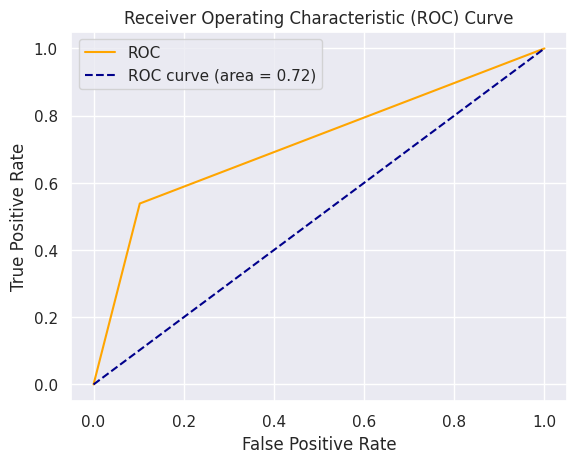

In [63]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [65]:
import bz2,pickle
file = bz2.BZ2File('../Model/modelForPrediction.pkl','wb')
pickle.dump(log_reg,file)
file.close()